## 1. 데이터 설명

- datetime - hourly date + timestamp 
- season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
           2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
           3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
           4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals

#### <u>The problem related to regression between classification and regression <u>
=> Because it is a problem to predict the amount of bicycle rental.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

import os

In [2]:
plt.rc('font', family='Malgun Gothic')

In [3]:
os.chdir('C:\Python\Practice Code\자전거 수요량 예측\Data')

In [4]:
os.listdir()

['test.csv', 'train.csv']

In [5]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [6]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [10,5]

## 2. **데이터 확인**

In [7]:
train_df.info()
print('-'*50)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime

- 'casual', 'registered', 'count' 에 대한 예측.
      => 'casual', 'registered', 'count'에 가장 큰 영향을 미치는 요인을 추출한다.

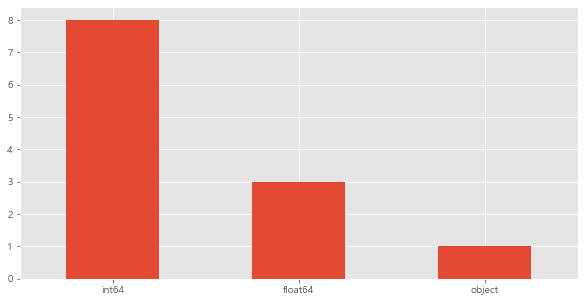

In [8]:
train_df.dtypes.value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

* NULL값은 존재하지 않으며, 8개의 int, 3개 float, 1개의 문자형 데이터가 존재한다.
* 여기에서의 object타입 변수는 datetime을 뜻하며 변경해줄 필요가 있으므로 datetime 형태로의 변환이 필요하다.

In [9]:
train_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [10]:
train_df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

<AxesSubplot:>

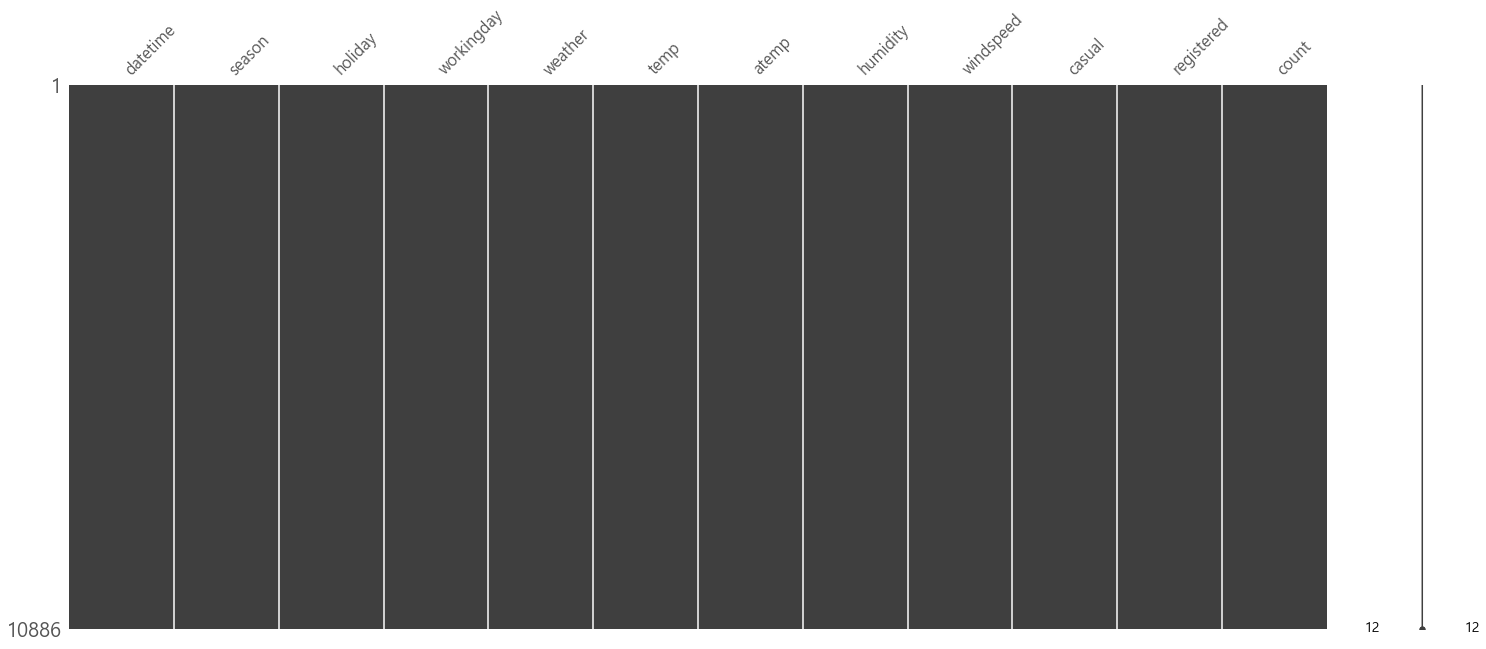

In [11]:
import missingno as msno
msno.matrix(train_df)

> NULL값은 존재하지 않는 것을 확인 할 수 있다.

## 3. 데이터 전처리
'datetime'의 타입을 datetime 형태로 변경(원데이터에서는 문자형)

In [12]:
train_df['datetime'] = pd.to_datetime(train_df['datetime'], format='%Y-%m-%d')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [13]:
train_df['year'] = train_df['datetime'].dt.year
train_df['month'] = train_df['datetime'].dt.month
train_df['day'] = train_df['datetime'].dt.day
train_df['hour'] = train_df['datetime'].dt.hour
train_df['minute'] = train_df['datetime'].dt.minute
train_df['second'] = train_df['datetime'].dt.second
train_df['weekday'] = train_df['datetime'].dt.weekday
train_df.shape

(10886, 19)

In [14]:
train_df.head()

#weekday : 0-Mon, 1-Tue, 2-Wed, 3-Thu, 4-Fri, 5-Sat, 6-Sun

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


## 4. EDA (시간에 따른 대여량 비교 시각화)

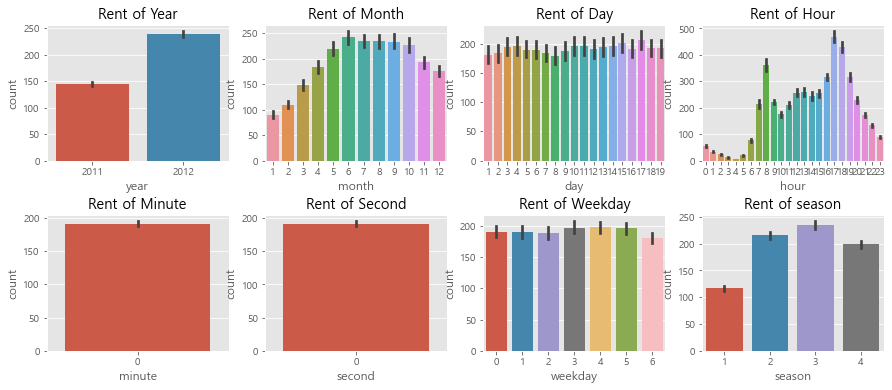

In [15]:
plt.figure(figsize=(15,6))

plt.subplot(241)
sns.barplot(data=train_df, x='year', y='count')
plt.title('Rent of Year')

plt.subplot(242)
sns.barplot(data=train_df, x='month', y='count')
plt.title('Rent of Month')

plt.subplot(243)
sns.barplot(data=train_df, x='day', y='count')
plt.title('Rent of Day')

plt.subplot(244)
sns.barplot(data=train_df, x='hour', y='count')
plt.title('Rent of Hour')

plt.subplot(245)
sns.barplot(data=train_df, x='minute', y='count')
plt.title('Rent of Minute')

plt.subplot(246)
sns.barplot(data=train_df, x='second', y='count')
plt.title('Rent of Second')

plt.subplot(247)
sns.barplot(data=train_df, x='weekday', y='count')
plt.title('Rent of Weekday')

plt.subplot(248)
sns.barplot(data=train_df, x='season', y='count')
plt.title('Rent of season')


plt.subplots_adjust(hspace=.4)
plt.show()

* year : 2012년 이용률은 2011년보다 약 1.5배가량 증가하였다. 
      (2011년에는 이용자들이 주변 사람들에게 홍보하고 추천했을 가능성이 있으며, 2012년에는 이용률이 상승했을 수 있다.)


* month : 추운 날보다 따뜻한 6,7,8월에 이용률이 높다.
* day : 데이터사 19일까지만 존재하므로 피쳐로써 사용할 수 없다.
* minute : 값이 없으며 0만 존재하므로 사용할 수 없다.
* second : 값이 없으며 0만 존재하므로 사용할 수 없다.
* weekday : 월요일부터 일요일까지 비교적 고른 분포를 보인다.( 0:월, 1:화, 2:수, 3:목, 4:금, 5:토, 6:일 )
* season : 자전거 대여율은 가을에 가장 높다. ( 1:봄, 2:여름, 3:가을, 4:겨울 )

In [16]:
# Remove 'minute' & 'second'
train_df.drop(['day', 'minute', 'second'], axis=1, inplace=True)
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,4,5


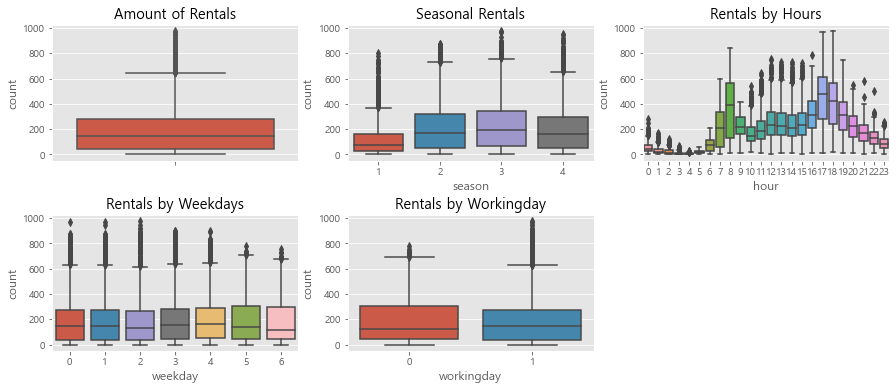

In [17]:
plt.figure(figsize=(15,6))

plt.subplot(231)
sns.boxplot(data=train_df, y='count', orient='v')   # orient='v' -> make a box vertically
plt.title('Amount of Rentals')

plt.subplot(232)
sns.boxplot(data=train_df, y='count', x='season', orient='v')   
plt.title('Seasonal Rentals')

plt.subplot(233)
sns.boxplot(data=train_df, y='count', x='hour', orient='v')   
plt.title('Rentals by Hours')

plt.subplot(234)
sns.boxplot(data=train_df, y='count', x='weekday', orient='v')   
plt.title('Rentals by Weekdays')

plt.subplot(235)
sns.boxplot(data=train_df, y='count', x='workingday', orient='v')   
plt.title('Rentals by Workingday')

plt.subplots_adjust(hspace=.4)
plt.show()

* 가을 > 여름 > 겨울 > 봄 순서로 많은 대여량을 보이고 있다.
* 출근여부에 따른 대여량 : 큰 차이는 보이지 않지만, 휴일이 근무일보다 조금 더 많은 대여량을 보이고있다.

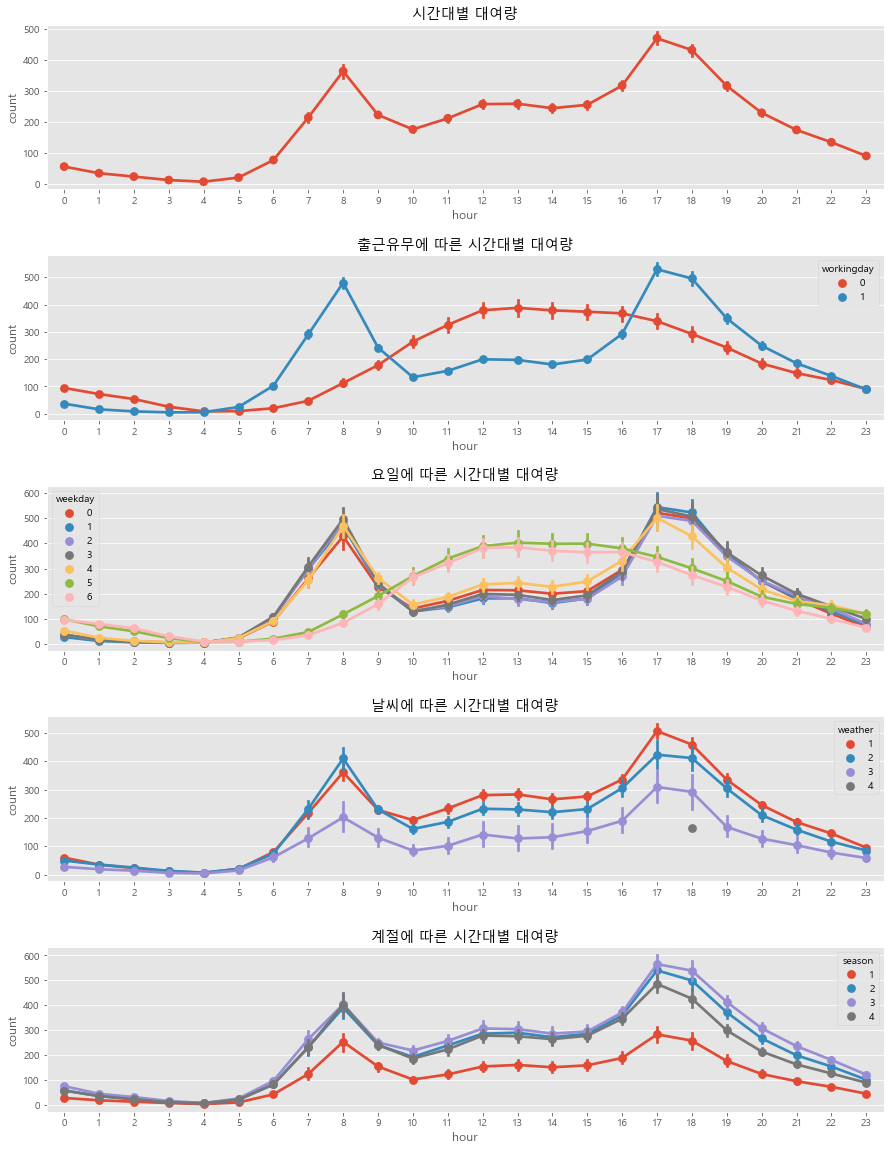

In [18]:
plt.figure(figsize=(15,20))

plt.subplot(511)
sns.pointplot(data=train_df, x='hour', y='count')
plt.title('시간대별 대여량')

plt.subplot(512)
sns.pointplot(data=train_df, x='hour', y='count', hue='workingday')
plt.title('출근유무에 따른 시간대별 대여량')

plt.subplot(513)
sns.pointplot(data=train_df, x='hour', y='count', hue='weekday')
plt.title('요일에 따른 시간대별 대여량')

plt.subplot(514)
sns.pointplot(data=train_df, x='hour', y='count', hue='weather')
plt.title('날씨에 따른 시간대별 대여량')

plt.subplot(515)
sns.pointplot(data=train_df, x='hour', y='count', hue='season')
plt.title('계절에 따른 시간대별 대여량')

plt.subplots_adjust(hspace=.4)
plt.show()

* 출퇴근시간대로 예상되는 8시, 17시, 18시, 19시에 가장 높은 이용률을 보인다.
* '날씨에 따른 시간대별 대여량'에서 '4'는 한개의 데이터로 보여 확인이 필요하다. 

In [19]:
train_df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

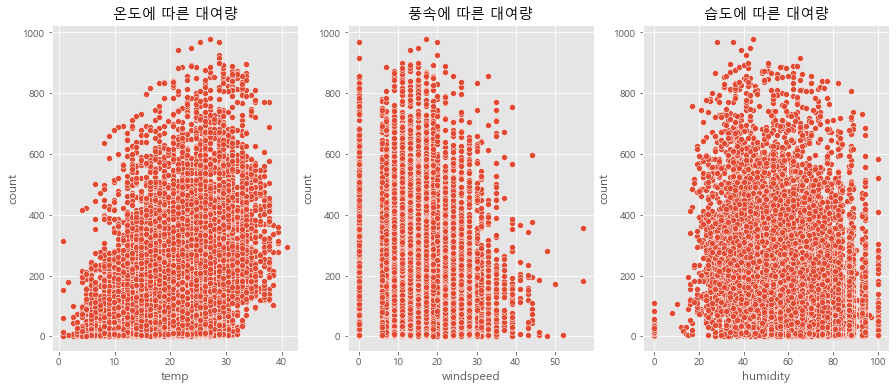

In [20]:
plt.figure(figsize=(15,6))

plt.subplot(131)
sns.scatterplot(data=train_df, x='temp', y='count')
plt.title('온도에 따른 대여량')

plt.subplot(132)
sns.scatterplot(data=train_df, x='windspeed', y='count')
plt.title('풍속에 따른 대여량')

plt.subplot(133)
sns.scatterplot(data=train_df, x='humidity', y='count')
plt.title('습도에 따른 대여량')

plt.show()

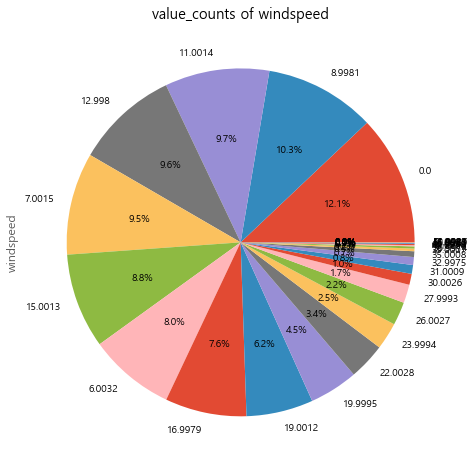

In [21]:
plt.figure(figsize=(8,8))
train_df['windspeed'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('value_counts of windspeed')
plt.show()

* '풍속'에서 값이 0 인 데이터가 많아 계산해 보니 실제로 전체의 12%를 차지하고 있음을 확인하였으며, 풍속 정보가 관측되지 않은 경우(결측)를 모두 0으로 기입한 것이 아닐까 하는 추측을 한다.

In [22]:
train_df['registered'].value_counts()

3      195
4      190
5      177
6      155
2      150
      ... 
636      1
620      1
678      1
694      1
839      1
Name: registered, Length: 731, dtype: int64

<AxesSubplot:xlabel='casual', ylabel='count'>

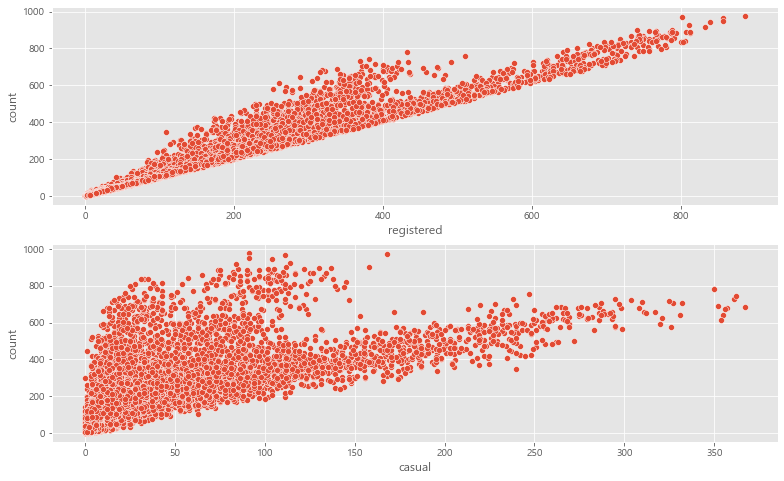

In [23]:
plt.figure(figsize=(13,8))

plt.subplot(211)
sns.scatterplot(data=train_df, x='registered', y='count')

plt.subplot(212)
sns.scatterplot(data=train_df, x='casual', y='count')

### 4-1. 상관분석

In [24]:
train_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'hour', 'weekday'],
      dtype='object')

* datetime -> 시계열데이터
* season, holiday, workingday, weekday -> 범주형데이터

=> 상관분석에서 제외

In [25]:
corrMatt = train_df.iloc[:,5:12]
corrMatt = corrMatt.corr()
print(corrMatt)

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

                temp     atemp  humidity  windspeed    casual  registered  \
temp        1.000000  0.984948 -0.064949  -0.017852  0.467097    0.318571   
atemp       0.984948  1.000000 -0.043536  -0.057473  0.462067    0.314635   
humidity   -0.064949 -0.043536  1.000000  -0.318607 -0.348187   -0.265458   
windspeed  -0.017852 -0.057473 -0.318607   1.000000  0.092276    0.091052   
casual      0.467097  0.462067 -0.348187   0.092276  1.000000    0.497250   
registered  0.318571  0.314635 -0.265458   0.091052  0.497250    1.000000   
count       0.394454  0.389784 -0.317371   0.101369  0.690414    0.970948   

               count  
temp        0.394454  
atemp       0.389784  
humidity   -0.317371  
windspeed   0.101369  
casual      0.690414  
registered  0.970948  
count       1.000000  


C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


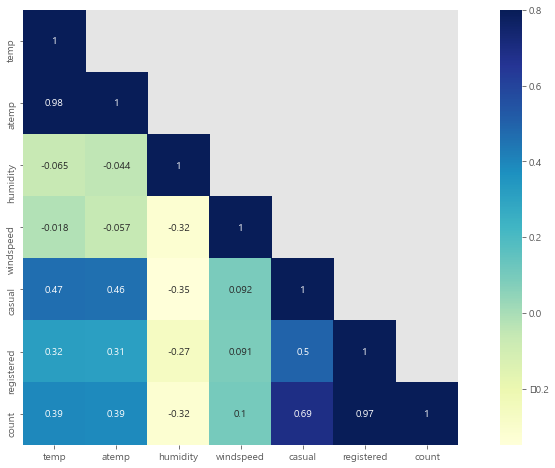

In [26]:
plt.figure(figsize=(15,8))
sns.heatmap(corrMatt, mask=mask, annot=True, square=True, vmax=.8, cmap='YlGnBu')
plt.show()

* 온도, 습도, 풍속은 연관관계가 거의 없다고 볼 수 있다.

* 대여량(count)과 가장 연관이 높은 건 registered로 등록된 대여자가 많지만, registered는 예측해야할 타겟변수이므로 feature에서 제외한다.

* atemp와 temp는 0.98로 상관관계가 높지만 온도와 체감온도로 피처를 사용하기에 적합하지 않을 수 있다.

In [27]:
train_df.drop('atemp', axis=1, inplace=True)
test_df.drop('atemp', axis=1, inplace=True)

### 4-2. 이상치 제거

* method 1 => IQR = Q3 - Q1
                  Outliers = Q1 - IQR*1.5 / Q3 + IQR*1.5
* method 2 => outliers = avg +- 3*Standard deviation.

Text(0.5, 1.0, '자전거 대여량 (Raw Data)')

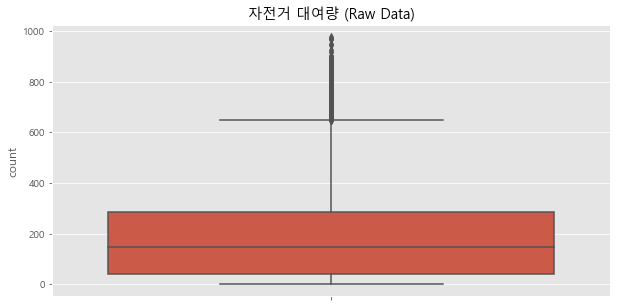

In [28]:
sns.boxplot(data=train_df, y='count', orient='v')
plt.title('자전거 대여량 (Raw Data)')

In [29]:
count_Q1 = np.percentile(train_df['count'], 25)
count_Q3 = np.percentile(train_df['count'], 75)

In [30]:
count_IQR = count_Q3 - count_Q1
count_IQR

242.0

In [31]:
# method 1
train_clean = train_df[(train_df['count'] >= (count_Q1-(1.5*count_IQR))) & (train_df['count'] <= (count_Q3+(1.5*count_IQR)))]

Text(0.5, 1.0, '자전거 대여량 (IQR Rule 이상치 제거)')

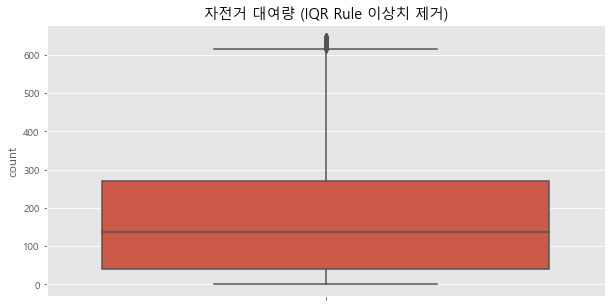

In [32]:
sns.boxplot(data=train_clean, y='count', orient='v')
plt.title('자전거 대여량 (IQR Rule 이상치 제거)')

In [33]:
# method 2
# 평균 +- 3*표준편차 를 벗어나는 데이터는 이상치로 간주한다(정규분포 기반)
train_clean_2 = (train_clean[np.abs(train_clean['count'] - train_clean['count'].mean() <=
                  (3*train_clean['count'].std()))])

Text(0.5, 1.0, '자전거 대여량 (정규분포기반 이상치 제거)')

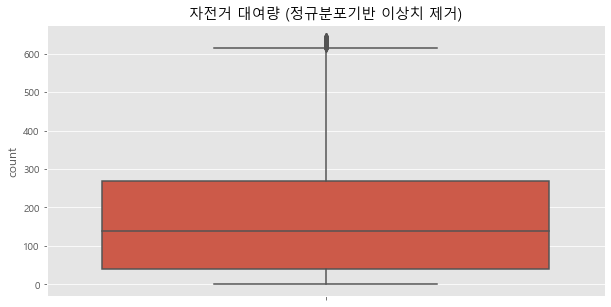

In [34]:
sns.boxplot(data=train_clean_2, y='count', orient='v')
plt.title('자전거 대여량 (정규분포기반 이상치 제거)')

* 이상치가 눈에띄게 줄어든 것을 확인 할 수 있다.
* 두가지 방법 모두 이상치 제거의 효능은 비슷해보인다.

### 4-3. 데이터 정규화

* "Datetim" 타입은 선형회귀에서 사용할 수 없으므로 숫자형 타입으로의 변환이 필요하다.

In [35]:
def to_int(datetime):
    return 10000*datetime.year + 100*datetime.month + datetime.day

datetime_int = train_clean['datetime'].apply(lambda x: to_int(x))
datetime_int

0        20110101
1        20110101
2        20110101
3        20110101
4        20110101
           ...   
10881    20121219
10882    20121219
10883    20121219
10884    20121219
10885    20121219
Name: datetime, Length: 10586, dtype: int64

In [36]:
train_clean['datetime'] = pd.Series(datetime_int)
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10586 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10586 non-null  int64  
 1   season      10586 non-null  int64  
 2   holiday     10586 non-null  int64  
 3   workingday  10586 non-null  int64  
 4   weather     10586 non-null  int64  
 5   temp        10586 non-null  float64
 6   humidity    10586 non-null  int64  
 7   windspeed   10586 non-null  float64
 8   casual      10586 non-null  int64  
 9   registered  10586 non-null  int64  
 10  count       10586 non-null  int64  
 11  year        10586 non-null  int64  
 12  month       10586 non-null  int64  
 13  hour        10586 non-null  int64  
 14  weekday     10586 non-null  int64  
dtypes: float64(2), int64(13)
memory usage: 1.3 MB


<ipython-input-36-df777e344a64>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_clean['datetime'] = pd.Series(datetime_int)


In [37]:
train_clean

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,year,month,hour,weekday
0,20110101,1,0,0,1,9.84,81,0.0000,3,13,16,2011,1,0,5
1,20110101,1,0,0,1,9.02,80,0.0000,8,32,40,2011,1,1,5
2,20110101,1,0,0,1,9.02,80,0.0000,5,27,32,2011,1,2,5
3,20110101,1,0,0,1,9.84,75,0.0000,3,10,13,2011,1,3,5
4,20110101,1,0,0,1,9.84,75,0.0000,0,1,1,2011,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,20121219,4,0,1,1,15.58,50,26.0027,7,329,336,2012,12,19,2
10882,20121219,4,0,1,1,14.76,57,15.0013,10,231,241,2012,12,20,2
10883,20121219,4,0,1,1,13.94,61,15.0013,4,164,168,2012,12,21,2
10884,20121219,4,0,1,1,13.94,61,6.0032,12,117,129,2012,12,22,2


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

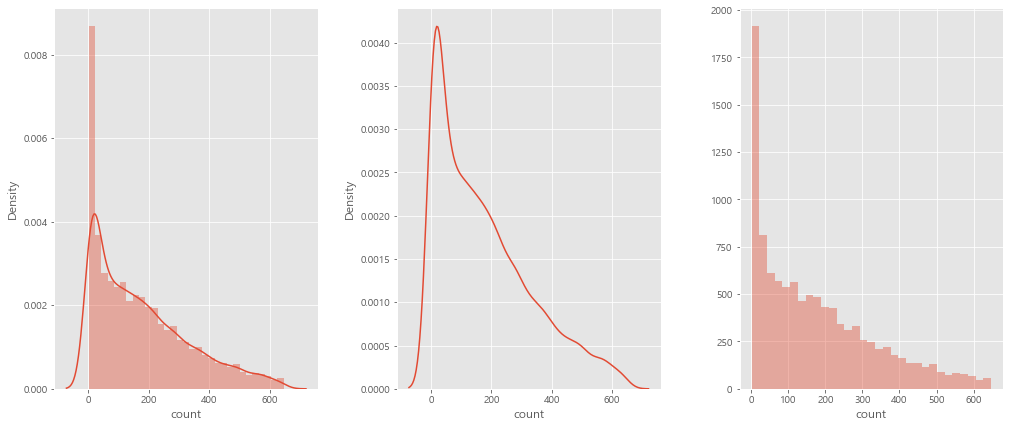

In [38]:
plt.figure(figsize=(17,7))

plt.subplot(131)
sns.distplot(train_clean['count'])

plt.subplot(132)
sns.distplot(train_clean['count'], hist=False)

plt.subplot(133)
sns.distplot(train_clean['count'], kde=False)

plt.subplots_adjust(wspace=.3)
plt.show()

In [39]:
train_clean_nor = np.log1p(train_clean)

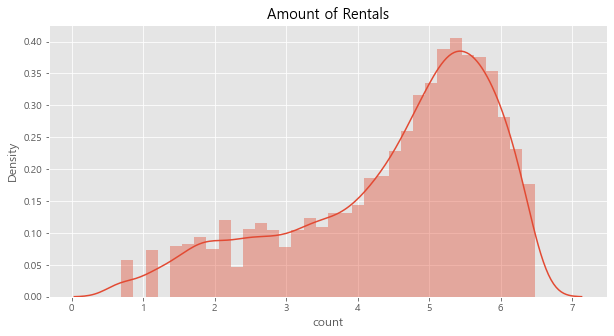

In [40]:
sns.distplot(train_clean_nor['count'])
plt.title('Amount of Rentals')
plt.show()

* 정규분포 형태로 만들기 위해 데이터에 로그를 씌워 데이터 값을 변형했고 완변한 정규분포 형태를 따르지는 않지만 이전보다 약간의 정규분포 형태에 가까워졌다


## 5. 모델링

In [41]:
train_clean_nor.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'year',
       'month', 'hour', 'weekday'],
      dtype='object')

In [42]:
test_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'humidity', 'windspeed'],
      dtype='object')

* test_df에 없는 두 feature(casual, registered)를 제거하고 test_df에도 날짜데이터를 활용한 컬럼을 맞춰준다

In [43]:
test_df['datetime'] = pd.to_datetime(test_df['datetime'], format='%Y-%m-%d')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   humidity    6493 non-null   int64         
 7   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(5)
memory usage: 405.9 KB


In [44]:
test_df['year'] = test_df['datetime'].dt.year
test_df['month'] = test_df['datetime'].dt.month
test_df['hour'] = test_df['datetime'].dt.hour
test_df['weekday'] = test_df['datetime'].dt.weekday
test_df.shape

(6493, 12)

In [45]:
train_clean.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'year',
       'month', 'hour', 'weekday'],
      dtype='object')

In [46]:
train_clean_nor.drop(columns=['registered', 'casual'], axis=1, inplace=True)
train_clean_nor.shape

(10586, 13)

In [47]:
test_df.shape

(6493, 12)

In [48]:
#for linear regression, trasform into numeric type.

test_df['datetime'] = pd.Series(test_df['datetime'].apply(lambda x : to_int(x)))
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   int64  
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   humidity    6493 non-null   int64  
 7   windspeed   6493 non-null   float64
 8   year        6493 non-null   int64  
 9   month       6493 non-null   int64  
 10  hour        6493 non-null   int64  
 11  weekday     6493 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 608.8 KB


* 타켓 변수인 'count'를 제외하고 훈련데이터와 테스트데이터의 feature 수와 형태가 일치한다.

### 5-1. 데이터 분리

In [49]:
# target과 features 구분
train_x = train_clean_nor.drop(columns='count', axis=1)   # 문제
train_y = train_clean_nor['count']                        # 정답
test_x = test_df

### 5-2 회귀분석

In [50]:
train_x.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'humidity', 'windspeed', 'year', 'month', 'hour', 'weekday'],
      dtype='object')

In [51]:
train_y

0        2.833213
1        3.713572
2        3.496508
3        2.639057
4        0.693147
           ...   
10881    5.820083
10882    5.488938
10883    5.129899
10884    4.867534
10885    4.488636
Name: count, Length: 10586, dtype: float64

In [52]:
from sklearn.linear_model import LinearRegression

#선형회귀모델 선언
linear_model = LinearRegression()

#모델 학습
linear_model.fit(train_x, train_y)

#예측
linear_model.predict(test_x)

#평가
linear_model.score(train_x, train_y)

0.4934624356052031

In [53]:
train_clean_nor

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,count,year,month,hour,weekday
0,16.816733,0.693147,0.0,0.000000,0.693147,2.383243,4.406719,0.000000,2.833213,7.606885,0.693147,0.000000,1.791759
1,16.816733,0.693147,0.0,0.000000,0.693147,2.304583,4.394449,0.000000,3.713572,7.606885,0.693147,0.693147,1.791759
2,16.816733,0.693147,0.0,0.000000,0.693147,2.304583,4.394449,0.000000,3.496508,7.606885,0.693147,1.098612,1.791759
3,16.816733,0.693147,0.0,0.000000,0.693147,2.383243,4.330733,0.000000,2.639057,7.606885,0.693147,1.386294,1.791759
4,16.816733,0.693147,0.0,0.000000,0.693147,2.383243,4.330733,0.000000,0.693147,7.606885,0.693147,1.609438,1.791759
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,16.817286,1.609438,0.0,0.693147,0.693147,2.808197,3.931826,3.295937,5.820083,7.607381,2.564949,2.995732,1.098612
10882,16.817286,1.609438,0.0,0.693147,0.693147,2.757475,4.060443,2.772670,5.488938,7.607381,2.564949,3.044522,1.098612
10883,16.817286,1.609438,0.0,0.693147,0.693147,2.704042,4.127134,2.772670,5.129899,7.607381,2.564949,3.091042,1.098612
10884,16.817286,1.609438,0.0,0.693147,0.693147,2.704042,4.127134,1.946367,4.867534,7.607381,2.564949,3.135494,1.098612


In [56]:
from statsmodels.formula.api import ols

ols('count ~ datetime + season + holiday + workingday + weather + temp + humidity + year + hour + weekday', 
   data=train_clean_nor).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     1026.
Date:                Mon, 07 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:56:43   Log-Likelihood:                -14972.
No. Observations:               10586   AIC:                         2.997e+04
Df Residuals:                   10575   BIC:                         3.005e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.001e+05      2e+04     -5.000      0.000   -1.39e+05   -6.08e+04
datetime    1.023e+04   2174.541      4.705      0.000    5968.663    1.45e+04
season        -0.0479      0.113     -0.424      0.672      -0.269       0.173
holiday        0.0769      0.098      0.788      0.430      -0.114       0.268
workingday    -0.0735      0.041     -1.805      0.071      -0.153       0.006
weather       -0.2914      0.043     -6.740      0.000      -0.376      -0.207
temp           0.8259      0.026     31.748      0.000       0.775       0.877
humidity      -0.4765      0.028    -16.901      0.000      -0.532      -0.421
year       -9462.5499   2176.864     -4.347      0.000   -1.37e+04   -5195.486
hour           0.9190      0.012     74.457      0.000       0.895       0.943
weekday        0.0601      0.021      2.902      0.004       0.020       0.101
==============================================================================
Omnibus:                      403.936   Durbin-Watson:                   0.716
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              454.119
Skew:                          -0.482   Prob(JB):                     2.45e-99
Kurtosis:                       3.314   Cond. No.                     4.06e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.06e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""